In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import LiwcTrie as lt
from Liwc import LiwcAnalyzer

from fbdp import FBDesktopParser

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alec\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Load facebook desktop parser
fbdp = FBDesktopParser()
fbdp.parse_posts().head()

,article_host,article_name,article_subtitle,hashtags,img-label,img_src,linked_profiles,links,text,timestamp
0,stopmandatoryvaccination.com,Get These Vaccine Books & DVDs Before Amazon B...,"This is where you start, right here, with thes...",[],Amazon Censorship Of Vaccine Books,./Stop Mandatory Vaccination - Posts_files/537...,[],[],"Get educated. Seriously, read several books an...","3/3/19, 4:27 PM"
1,None,None,None,[],None,./Stop Mandatory Vaccination - Posts_files/530...,[],[http://bit.ly/Thyroid_Reset],"Your host of The Thyroid Reset Summit, Dr. Jus...","3/5/19, 1:00 PM"
2,None,None,None,[],None,None,[],[],If the US Federal Govt mandates vaccines will ...,"3/5/19, 12:28 PM"
3,physiciansforinformedconsent.org,physiciansforinformedconsent.org,None,[],None,None,[Health Choice Minnesota],[https://physiciansforinformedconsent.org/…/PI...,🚨 Urgent 🚨 U.S. Senate public hearing on “Vac...,"3/5/19, 12:26 PM"
4,None,None,None,"[HumanRIGHTS, paid, demonstration, corruption,...",None,./Stop Mandatory Vaccination - Posts_files/536...,"[Stef Miharas, Laira De La Vega]",[],"Here is what corruption looks like, up close a...","3/5/19, 12:21 PM"


In [3]:
#Extract fbdp features
fbdp.extract_features(bag_of_words=False, lemmatize=True).head()

,article_host,article_name,article_subtitle,hashtags,img-label,img_src,linked_profiles,links,text,timestamp,...,num_periods,percent_periods,num_exclamations,percent_exclamations,num_questionms,percent_questionms,num_equals,percent_equals,num_dollars,percent_dollars
0,stopmandatoryvaccination.com,Get These Vaccine Books & DVDs Before Amazon B...,"This is where you start, right here, with thes...",[],Amazon Censorship Of Vaccine Books,./Stop Mandatory Vaccination - Posts_files/537...,[],[],"Get educated. Seriously, read several books an...","3/3/19, 4:27 PM",...,5,0.042017,0,0.0,0,0.000000,0,0.0,0,0.0
1,None,None,None,[],None,./Stop Mandatory Vaccination - Posts_files/530...,[],[http://bit.ly/Thyroid_Reset],"Your host of The Thyroid Reset Summit, Dr. Jus...","3/5/19, 1:00 PM",...,2,0.027027,0,0.0,0,0.000000,0,0.0,0,0.0
2,None,None,None,[],None,None,[],[],If the US Federal Govt mandates vaccines will ...,"3/5/19, 12:28 PM",...,0,0.000000,0,0.0,1,0.071429,0,0.0,0,0.0
3,physiciansforinformedconsent.org,physiciansforinformedconsent.org,None,[],None,None,[Health Choice Minnesota],[https://physiciansforinformedconsent.org/…/PI...,🚨 Urgent 🚨 U.S. Senate public hearing on “Vac...,"3/5/19, 12:26 PM",...,18,0.019397,0,0.0,2,0.002155,0,0.0,0,0.0
4,None,None,None,"[HumanRIGHTS, paid, demonstration, corruption,...",None,./Stop Mandatory Vaccination - Posts_files/536...,"[Stef Miharas, Laira De La Vega]",[],"Here is what corruption looks like, up close a...","3/5/19, 12:21 PM",...,12,0.036923,0,0.0,2,0.006154,0,0.0,0,0.0


In [4]:
#Extract liwc features
liwc = LiwcAnalyzer()
liwc_results = liwc.parse(fbdp.posts.text)
liwc_results.head()

,wc,sc,wps,dic,sixltr,funct,pronoun,ppron,i,we,...,work,achiev,leisure,home,money,relig,death,assent,nonflu,filler
0,102,5,20.400000,0.901961,24,0.656863,0.294118,0.147059,0.009804,0.029412,...,0.196078,0.058824,0.088235,0.029412,0.058824,0.078431,0.009804,0.000000,0.000000,0.068627
1,66,4,16.500000,0.818182,14,0.500000,0.227273,0.181818,0.000000,0.000000,...,0.227273,0.151515,0.121212,0.060606,0.015152,0.166667,0.106061,0.030303,0.000000,0.030303
2,13,1,13.000000,0.692308,5,0.538462,0.230769,0.230769,0.000000,0.076923,...,0.153846,0.076923,0.153846,0.076923,0.000000,0.153846,0.076923,0.000000,0.000000,0.076923
3,541,42,12.880952,0.667283,128,0.404806,0.175601,0.140481,0.003697,0.022181,...,0.219963,0.146026,0.175601,0.096118,0.134935,0.146026,0.105360,0.029575,0.035120,0.014787
4,278,18,15.444444,0.902878,30,0.636691,0.273381,0.183453,0.014388,0.068345,...,0.208633,0.129496,0.176259,0.082734,0.122302,0.172662,0.086331,0.007194,0.028777,0.021583


In [5]:
#What features did our LIWC analysis extract?
liwc_results.columns

Index(['wc', 'sc', 'wps', 'dic', 'sixltr', 'funct', 'pronoun', 'ppron', 'i',
       'we', 'you', 'shehe', 'they', 'ipron', 'article', 'verbs', 'auxvb',
       'past', 'present', 'future', 'adverbs', 'prep', 'conj', 'negate',
       'quant', 'numbers', 'swear', 'social', 'family', 'friends', 'humans',
       'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'cogmech',
       'insight', 'cause', 'discrep', 'tentat', 'certain', 'inhib', 'incl',
       'excl', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health',
       'sexual', 'ingest', 'relativ', 'motion', 'space', 'time', 'work',
       'achiev', 'leisure', 'home', 'money', 'relig', 'death', 'assent',
       'nonflu', 'filler'],
      dtype='object')

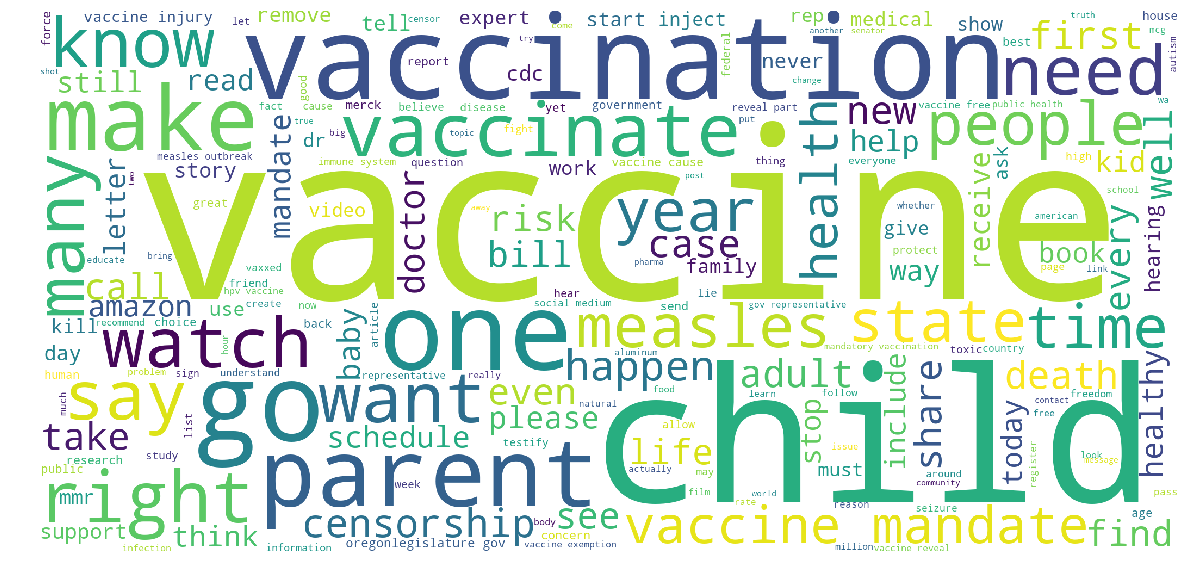

In [6]:
#View word cloud of text
fbdp.make_wordcloud(include_vaccine_words=True)

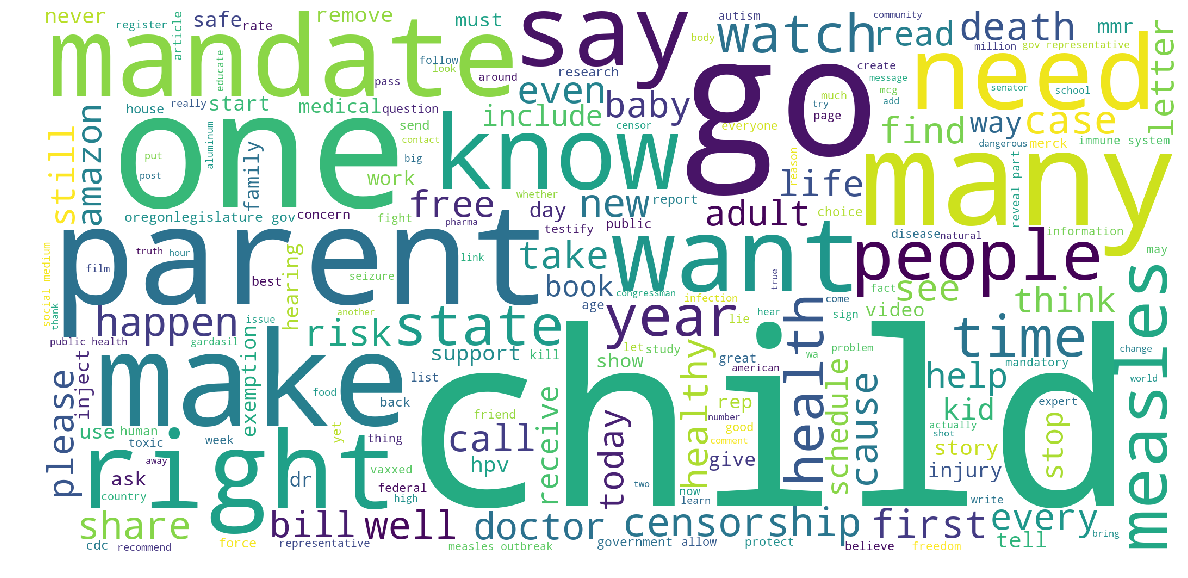

In [7]:
fbdp.make_wordcloud()

In [8]:
fbdp.posts.dtypes

article_host                  object
article_name                  object
article_subtitle              object
hashtags                      object
img-label                     object
img_src                       object
linked_profiles               object
links                         object
text                          object
timestamp                     object
has_article                     bool
text_length                    int64
num_hashtags                   int64
has_text                        bool
num_linked_profiles            int64
num_links                      int64
text_tokenized                object
num_tokens                     int64
text_tokenized_filtered       object
text_tokenized_lemmatized     object
num_words                      int64
num_periods                    int64
percent_periods              float64
num_exclamations               int64
percent_exclamations         float64
num_questionms                 int64
percent_questionms           float64
n

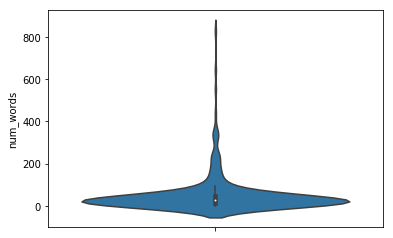

In [10]:
import seaborn as sns
sns.violinplot(fbdp.posts.num_words, orient='v')

In [62]:
def build_violins(df, ncols=4):
    nums = df._get_numeric_data()
    nrows = int(len(nums.columns) / ncols) + (1 if len(nums.columns) % ncols != 0 else 0)
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20))
    for i, column in enumerate(nums.columns):
        sns.violinplot(nums[column], orient='v', ax=axes[int(i / ncols), i % ncols], color='red')
    plt.show()

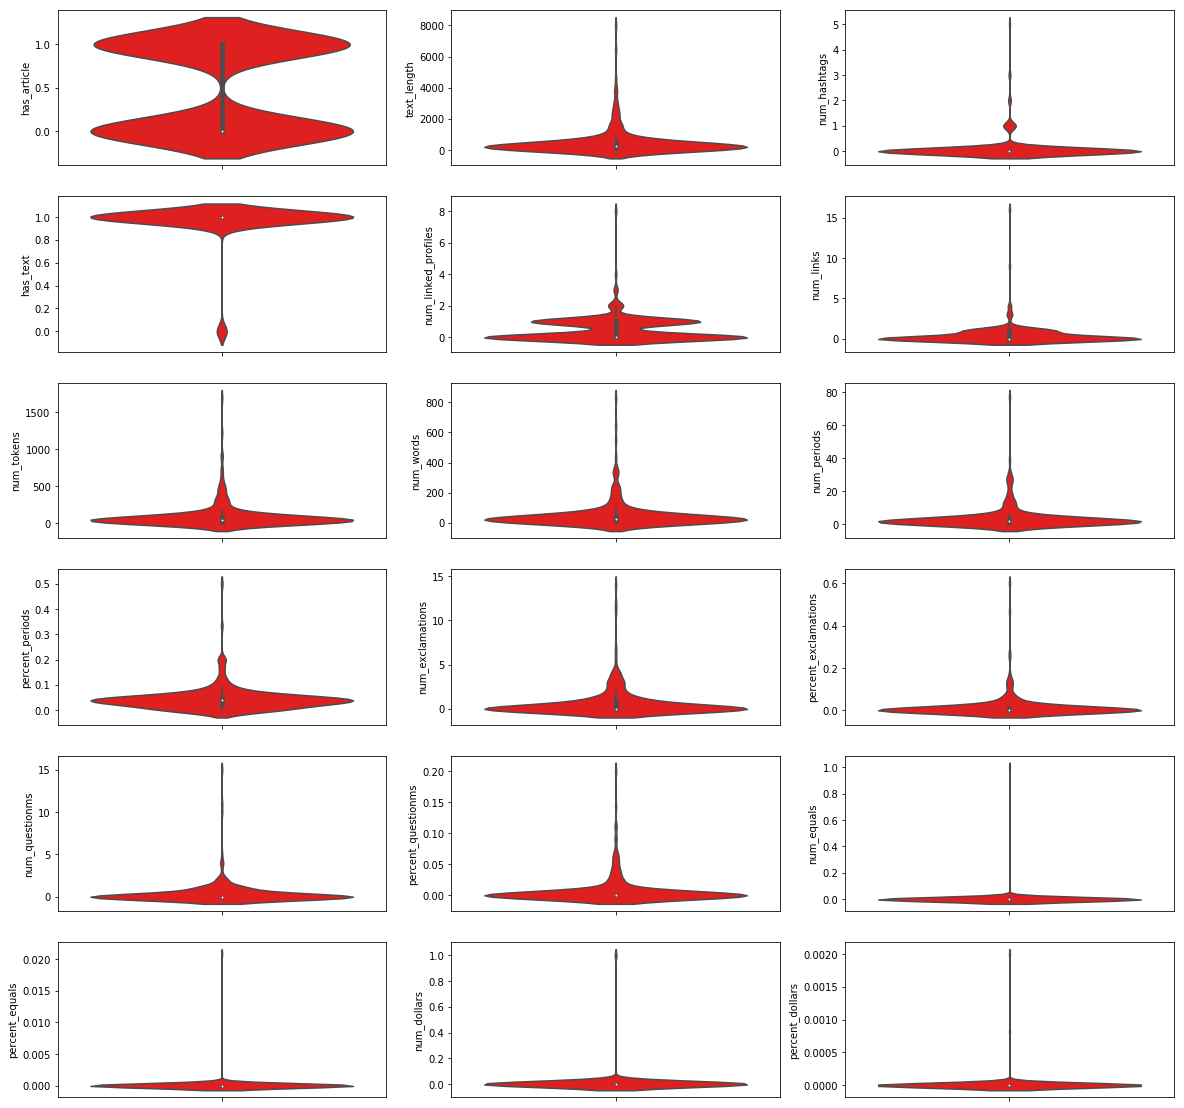

In [63]:
build_violins(fbdp.posts, ncols=3)